Use the models to predict the bulk measurements into Avaatech resolution (10 mm).

In [1]:
import numpy as np 
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

%matplotlib inline

# Read spe dataset and models

In [18]:
spe_df = pd.read_csv('data/spe_dataset_20201008.csv', index_col = 0)
X = spe_df.iloc[:, :2048].values
X = X / X.sum(axis = 1, keepdims = True)

In [21]:
spe_df.columns[-5:]

Index(['core', 'composite_depth_mm', 'section_depth_mm', 'filename',
       'section'],
      dtype='object')

In [10]:
from joblib import load
m_caco3 = load('models/caco3_nmf+svr_model_20201012.joblib')
m_toc = load('models/toc_nmf+svr_model_20201012.joblib')
m_tc = load('models/tc_nmf+svr_model_20201012.joblib')

# Predict

In [19]:
y_caco3 = m_caco3.predict(X)
y_toc = m_toc.predict(X)
y_tc = m_tc.predict(X)

# Build dataset

In [22]:
predict_df = spe_df.iloc[:, -5:].copy()
predict_df['CaCO3 prediction (%)'] = y_caco3
predict_df['TOC prediction (%)'] = y_toc
predict_df['TC prediction (%)'] = y_tc

In [23]:
predict_df

,core,composite_depth_mm,section_depth_mm,filename,section,CaCO3 prediction (%),TOC prediction (%),TC prediction (%)
composite_id,,,,,,,,
SO264-09-2_00010,SO264-09-2,10,10,SO264-09-2_0000 10.0mm 10s 10kV 150uA No-F...,0,84.298726,0.346583,10.242122
SO264-09-2_00020,SO264-09-2,20,20,SO264-09-2_0000 20.0mm 10s 10kV 150uA No-F...,0,86.519613,0.320136,10.489510
SO264-09-2_00030,SO264-09-2,30,30,SO264-09-2_0000 30.0mm 10s 10kV 150uA No-F...,0,89.700659,0.278939,10.844421
SO264-09-2_00040,SO264-09-2,40,40,SO264-09-2_0000 40.0mm 10s 10kV 150uA No-F...,0,89.556269,0.276873,10.821880
SO264-09-2_00050,SO264-09-2,50,50,SO264-09-2_0000 50.0mm 10s 10kV 150uA No-F...,0,89.970072,0.279820,10.863366
...,...,...,...,...,...,...,...,...
SO264-76-1_04370,SO264-76-1,4370,1120,SO264-76-1_0325 1120.0mm 10s 10kV 150uA No-F...,3,1.797913,0.233742,0.326492
SO264-76-1_04380,SO264-76-1,4380,1130,SO264-76-1_0325 1130.0mm 10s 10kV 150uA No-F...,3,1.792156,0.212765,0.313516
SO264-76-1_04390,SO264-76-1,4390,1140,SO264-76-1_0325 1140.0mm 10s 10kV 150uA No-F...,3,0.017349,0.168813,0.114502


In [25]:
predict_df.tail()

,core,composite_depth_mm,section_depth_mm,filename,section,CaCO3 prediction (%),TOC prediction (%),TC prediction (%)
composite_id,,,,,,,,
SO264-76-1_04370,SO264-76-1,4370,1120,SO264-76-1_0325 1120.0mm 10s 10kV 150uA No-F...,3,1.797913,0.233742,0.326492
SO264-76-1_04380,SO264-76-1,4380,1130,SO264-76-1_0325 1130.0mm 10s 10kV 150uA No-F...,3,1.792156,0.212765,0.313516
SO264-76-1_04390,SO264-76-1,4390,1140,SO264-76-1_0325 1140.0mm 10s 10kV 150uA No-F...,3,0.017349,0.168813,0.114502
SO264-76-1_04400,SO264-76-1,4400,1150,SO264-76-1_0325 1150.0mm 10s 10kV 150uA No-F...,3,0.945594,0.196107,0.235153
SO264-76-1_04410,SO264-76-1,4410,1160,SO264-76-1_0325 1160.0mm 10s 10kV 150uA No-F...,3,-8.070426,-0.274094,-0.496562


# Problems
There are predictions below 0 and over 100.

In [26]:
predict_df[predict_df['CaCO3 prediction (%)'] < 0]

,core,composite_depth_mm,section_depth_mm,filename,section,CaCO3 prediction (%),TOC prediction (%),TC prediction (%)
composite_id,,,,,,,,
SO264-09-2_10690,SO264-09-2,10690,1000,SO264-09-2_0969 1000.0mm 10s 10kV 150uA No-F...,10,-12.025440,0.554944,-1.135402
SO264-19-2_00470,SO264-19-2,470,130,SO264-19-2_00340 130.0mm 10s 10kV 150uA No-...,1,-0.004799,0.207358,0.245297
SO264-19-2_02340,SO264-19-2,2340,1000,SO264-19-2_01340 1000.0mm 10s 10kV 150uA No-...,2,-0.130585,0.231295,0.164010
SO264-19-2_02460,SO264-19-2,2460,120,SO264-19-2_02340 120.0mm 10s 10kV 150uA No-...,3,-0.021384,0.216739,0.244950
SO264-19-2_02630,SO264-19-2,2630,290,SO264-19-2_02340 290.0mm 10s 10kV 150uA No-...,3,-0.805713,0.241535,0.321321
...,...,...,...,...,...,...,...,...
SO264-76-1_02930,SO264-76-1,2930,670,SO264-76-1_0226 670.0mm 10s 10kV 150uA No-F...,2,-2.574181,0.246851,0.248250
SO264-76-1_03420,SO264-76-1,3420,170,SO264-76-1_0325 170.0mm 10s 10kV 150uA No-F...,3,-18.285134,0.179241,-1.605852
SO264-76-1_04260,SO264-76-1,4260,1010,SO264-76-1_0325 1010.0mm 10s 10kV 150uA No-F...,3,-0.697318,0.279956,0.162939


In [78]:
mask = (predict_df['CaCO3 prediction (%)'] < 0) | (predict_df['TOC prediction (%)'] < 0) | (predict_df['TC prediction (%)'] < 0)|(predict_df['CaCO3 prediction (%)'] > 100) | (predict_df['TOC prediction (%)'] > 100) | (predict_df['TC prediction (%)'] > 100)

print('There are {:.1f} % of data having predictions below 0 or over 100.'.format(len(predict_df[mask])/len(predict_df)*100))

There are 8.5 % of data having predictions below 0 or over 100.


In [79]:
mask = (predict_df['CaCO3 prediction (%)'] < 0) | (predict_df['TOC prediction (%)'] < 0) | (predict_df['TC prediction (%)'] < 0)

print('There are {:.1f} % of data having predictions below 0.'.format(len(predict_df[mask])/len(predict_df)*100))

There are 7.7 % of data having predictions below 0.


In [80]:
mask = (predict_df['CaCO3 prediction (%)'] > 100) | (predict_df['TOC prediction (%)'] > 100) | (predict_df['TC prediction (%)'] > 100)

print('There are {:.1f} % of data having predictions over 100.'.format(len(predict_df[mask])/len(predict_df)*100))

There are 0.8 % of data having predictions over 100.


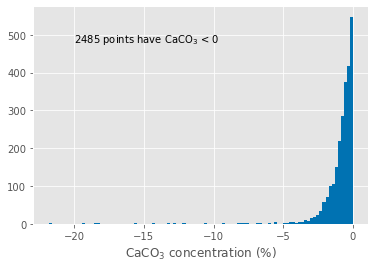

In [73]:
plt.hist(predict_df.loc[predict_df['CaCO3 prediction (%)'] < 0, 'CaCO3 prediction (%)'], bins = 100)
plt.text(-20, 480, '{} points have CaCO{} < 0'.format(len(predict_df[predict_df['CaCO3 prediction (%)'] < 0]), r'${_3}$'));
plt.xlabel('CaCO${_3}$ concentration (%)');

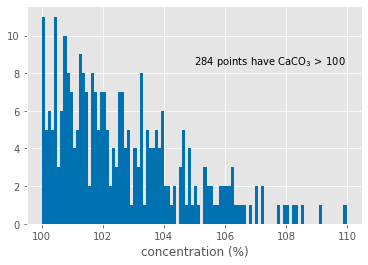

In [70]:
plt.hist(predict_df.loc[predict_df['CaCO3 prediction (%)'] > 100, 'CaCO3 prediction (%)'], bins = 100)
plt.text(105, 8.5, '{} points have CaCO{} > 100'.format(len(predict_df[predict_df['CaCO3 prediction (%)'] > 100]), r'${_3}$'));
plt.xlabel('concentration (%)');

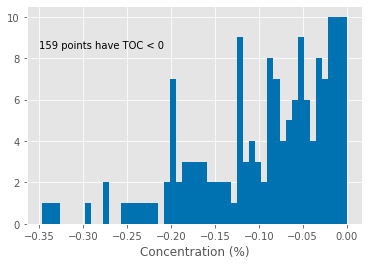

In [61]:
plt.hist(predict_df.loc[predict_df['TOC prediction (%)'] < 0, 'TOC prediction (%)'], bins = 50)
plt.xlabel('Concentration (%)')
plt.text(-.35, 8.5, '{} points have TOC < 0'.format(len(predict_df[predict_df['TOC prediction (%)'] < 0])));


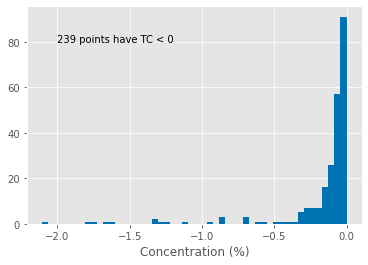

In [57]:
plt.hist(predict_df.loc[predict_df['TC prediction (%)'] < 0, 'TC prediction (%)'], bins = 50)
plt.xlabel('Concentration (%)')
plt.text(-2, 80, '{} points have TC < 0'.format(len(predict_df[predict_df['TC prediction (%)'] < 0])));

# Export datset

In [24]:
predict_df.to_csv('results/prediction_{}.csv'.format(date))

# Summary
Unfortunately, there are predictions below 0 and over 100. Although the models are built using non-linear algorithm, it's not guaranteed to predict values within 0 and 100. These unrealistic predictions account for 8.5 % of the whole dataset (34,322). Their true values are close to the [0, 100] edges, which might also stand for bad scanning quality. If JC think 8.5 % is acceptable, then we can simply delete them or make them to be 0 or 100. Otherwise, I might need to try Multi-layer Perceptron (i.e. Nueral network) using Keras. I'm not sure if Sklearn can achive the customization of the output (the last layer). <br>
https://stackoverflow.com/questions/51683915/how-can-i-limit-regression-output-between-0-to-1-in-keras <br>
https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/